# 图像分割

## 1、固定阈值

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
# 灰度图读入
img = cv.imread('images/thresh.png', 0)
print(img)
threshold = 127
# 阈值分割
ret, th = cv.threshold(img, threshold, 255, cv.THRESH_BINARY)
print(ret)
print(th)

cv.imshow('thresh', th)
cv.waitKey(0)
cv.destroyAllWindows()

[[  1   3   3 ...  49  49  64]
 [  2   2   2 ... 252 253 250]
 [  5   2   2 ... 253 251 249]
 ...
 [  1   0   0 ... 255 254 255]
 [  2   1   1 ... 141 141 147]
 [  1   1   1 ...   3   4  11]]
127.0
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]]


## 2、固定阈值不同方法的比较

[[  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255   0 ...   0 255 255]]


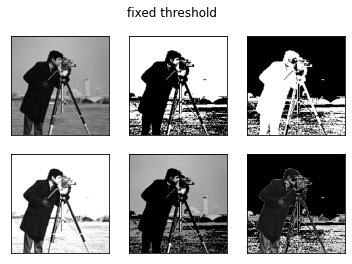

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/person.png', 0)
#print(img)

#5种阈值法图像分割
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
print(thresh1)

images = [img, thresh1, thresh2, thresh3, thresh4,thresh5]
#使用for循环进行遍历，matplotlib进行显示
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.suptitle('fixed threshold')
plt.show()

## 3、自适应阈值与固定阈值的对比

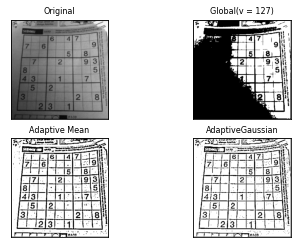

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/paper2.png', 0)
# 固定阈值
ret, th1 = cv.threshold(img, 127, 255,cv.THRESH_BINARY)
# 自适应阈值
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 4)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 4)
#全局阈值，均值自适应，高斯加权自适应对比
titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'AdaptiveGaussian']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])

plt.show()

## 4、迭代法

120.0


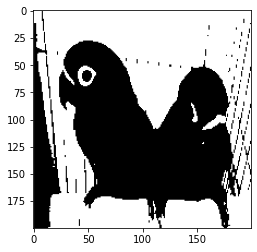

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def best_thresh(img):
    img_array = np.array(img).astype(np.float32)#转化成数组
    I=img_array
    zmax=np.max(I)
    zmin=np.min(I)
    tk=(zmax+zmin)/2#设置初始阈值
    #根据阈值将图像进行分割为前景和背景，分别求出两者的平均灰度zo和zb
    b=1
    m,n=I.shape;
    while b==0:
        ifg=0
        ibg=0
        fnum=0
        bnum=0
        for i in range(1,m):
             for j in range(1,n):
                tmp=I(i,j)
                if tmp>=tk:
                    ifg=ifg+1
                    fnum=fnum+int(tmp)#前景像素的个数以及像素值的总和
                else:
                    ibg=ibg+1
                    bnum=bnum+int(tmp)#背景像素的个数以及像素值的总和
        #计算前景和背景的平均值
        zo=int(fnum/ifg)
        zb=int(bnum/ibg)
        if tk==int((zo+zb)/2):
            b=0
        else:
            tk=int((zo+zb)/2)
    return tk

img = cv2.imread("images/bird.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray,(200,200))#大小
yvzhi=best_thresh(img)
ret1, th1 = cv2.threshold(img, yvzhi, 255, cv2.THRESH_BINARY)
print(ret1)
plt.imshow(th1,cmap=cm.gray)
plt.show()

## 5、OTSU大津法

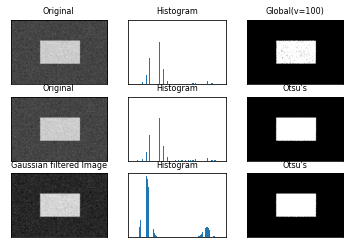

In [3]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('images/noisy.png', 0)
# 固定阈值法
ret1, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# Otsu阈值法
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 先进行高斯滤波，再使用Otsu阈值法
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original', 'Histogram', 'Global(v=100)',
         'Original', 'Histogram', "Otsu's",
         'Gaussian filtered Image', 'Histogram', "Otsu's"]

for i in range(3):
    # 绘制原图
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3], fontsize=8)
    plt.xticks([]), plt.yticks([])
    
    # 绘制直方图plt.hist, ravel函数将数组降成一维
    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1], fontsize=8)
    plt.xticks([]), plt.yticks([])
    
    # 绘制阈值图
    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

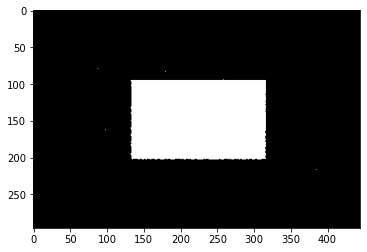

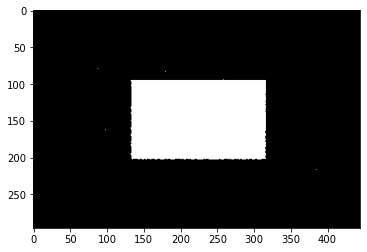

In [7]:
import numpy as np
import cv2
import matplotlib.cm as cm

def OTSU_enhance(img_gray, th_begin=0, th_end=256, th_step=1):
    #"must input a gary_img"
    assert img_gray.ndim == 2
 
    max_g = 0
    suitable_th = 0
    for threshold in range(th_begin, th_end, th_step):
        bin_img = img_gray > threshold
        bin_img_inv = img_gray <= threshold
        fore_pix = np.sum(bin_img)
        back_pix = np.sum(bin_img_inv)
        if 0 == fore_pix:
            break
        if 0 == back_pix:
            continue
 
        w0 = float(fore_pix) / img_gray.size
        u0 = float(np.sum(img_gray * bin_img)) / fore_pix
        w1 = float(back_pix) / img_gray.size
        u1 = float(np.sum(img_gray * bin_img_inv)) / back_pix
        # intra-class variance
        g = w0 * w1 * (u0 - u1) * (u0 - u1)
        if g > max_g:
            max_g = g
            suitable_th = threshold
    return suitable_th
img = cv2.imread('images/noisy.png', 0)
thresh = OTSU_enhance(img)
ret1, th1 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
a = plt.imshow(th1,cmap=cm.gray)
plt.show(a)
b = plt.imshow(th2,cmap=cm.gray)
plt.show(b)

## 6、SOBEL

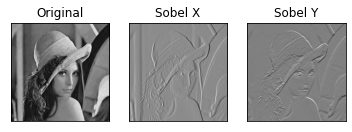

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv2.imread('images/girl2.png',0)
sobelx = cv.Sobel(img, cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img, cv.CV_64F,0,1,ksize=5)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

## 7、边缘检测算法

In [11]:
#加载opencv和numpy
import cv2
import numpy as np
#以灰度图形式读入图像
img = cv2.imread('images/canny.png')
v1 = cv2.Canny(img, 80, 150,(3,3))
v2 = cv2.Canny(img, 50, 100,(5,5))

#np.vstack():在竖直方向上堆叠
#np.hstack():在水平方向上平铺堆叠
ret = np.hstack((v1, v2))
cv2.imshow('img', ret)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8、区域连通分析

In [1]:
import cv2
import numpy as np

# 4邻域的连通域和 8邻域的连通域
# [row, col]
NEIGHBOR_HOODS_4 = True
OFFSETS_4 = [[0, -1], [-1, 0], [0, 0], [1, 0], [0, 1]]

NEIGHBOR_HOODS_8 = False
OFFSETS_8 = [[-1, -1], [0, -1], [1, -1],
             [-1,  0], [0,  0], [1,  0],
             [-1,  1], [0,  1], [1,  1]]
#第二遍扫描
def reorganize(binary_img: np.array):
    index_map = []
    points = []
    index = -1
    rows, cols = binary_img.shape
    for row in range(rows):
        for col in range(cols):
            var = binary_img[row][col]
            if var < 0.5:
                continue
            if var in index_map:
                index = index_map.index(var)
                num = index + 1
            else:
                index = len(index_map)
                num = index + 1
                index_map.append(var)
                points.append([])
            binary_img[row][col] = num
            points[index].append([row, col])
    #print(binary_img)
    #print(points)
    return binary_img, points

#四领域或八领域判断
def neighbor_value(binary_img: np.array, offsets, reverse=False):
    rows, cols = binary_img.shape
    label_idx = 0
    rows_ = [0, rows, 1] if reverse == False else [rows-1, -1, -1]
    cols_ = [0, cols, 1] if reverse == False else [cols-1, -1, -1]
    for row in range(rows_[0], rows_[1], rows_[2]):
        for col in range(cols_[0], cols_[1], cols_[2]):
            label = 256
            if binary_img[row][col] < 0.5:
                continue
            for offset in offsets:
                neighbor_row = min(max(0, row+offset[0]), rows-1)
                neighbor_col = min(max(0, col+offset[1]), cols-1)
                neighbor_val = binary_img[neighbor_row, neighbor_col]
                if neighbor_val < 0.5:
                    continue
                label = neighbor_val if neighbor_val < label else label
            if label == 255:
                label_idx += 1
                label = label_idx
            binary_img[row][col] = label
    print('第一遍扫描：',binary_img)
    print('开始第二遍...')
    return binary_img

# binary_img: bg-0, object-255; int
#第一遍扫描
def Two_Pass(binary_img: np.array, neighbor_hoods):
    if neighbor_hoods == NEIGHBOR_HOODS_4:
        offsets = OFFSETS_4
    elif neighbor_hoods == NEIGHBOR_HOODS_8:
        offsets = OFFSETS_8
    else:
        raise ValueError

    binary_img = neighbor_value(binary_img, offsets, False)

    return binary_img

if __name__ == "__main__":
    #创建四行七列的矩阵
    binary_img = np.zeros((4, 7), dtype=np.int16)
    #指定点设置为255
    index = [[0, 2], [0, 5],
            [1, 0], [1, 1], [1, 2], [1, 4], [1, 5], [1, 6],
            [2, 2], [2, 5],
            [3, 1], [3, 2], [3, 4],[3,5], [3, 6]]
    for i in index:
        binary_img[i[0], i[1]] = np.int16(255)

    print("原始二值图像")
    print(binary_img)

    #print("Two_Pass")
    #调用Two Pass算法，计算第一遍扫面的结果
    binary_img = Two_Pass(binary_img, NEIGHBOR_HOODS_4)
    #print(binary_img)
    #计算第一遍扫面的结果
    binary_img, points = reorganize(binary_img)
    print(binary_img)
    #print(points)

原始二值图像
[[  0   0 255   0   0 255   0]
 [255 255 255   0 255 255 255]
 [  0   0 255   0   0 255   0]
 [  0 255 255   0 255 255 255]]
第一遍扫描： [[0 0 1 0 0 2 0]
 [3 3 1 0 4 2 2]
 [0 0 1 0 0 2 0]
 [0 5 1 0 6 2 2]]
开始第二遍...
[[0 0 1 0 0 2 0]
 [3 3 1 0 4 2 2]
 [0 0 1 0 0 2 0]
 [0 5 1 0 6 2 2]]


## 9、区域生长算法

In [2]:
# -*- coding:utf-8 -*-
import cv2
import numpy as np

####################################################################################



#######################################################################################
class Point(object):
    def __init__(self , x , y):
        self.x = x
        self.y = y
    def getX(self):
        return self.x
    def getY(self):
        return self.y
connects = [ Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0),
            Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
#####################################################################################
#计算两个点间的欧式距离
def get_dist(seed_location1,seed_location2):
    l1 = im[seed_location1.x , seed_location1.y]
    l2 = im[seed_location2.x , seed_location2.y]
    count = np.sqrt(np.sum(np.square(l1-l2)))
    return count

#import Image
im = cv2.imread('images/222.jpg')
cv2.imshow('src' , im)
cv2.waitKey(0)
cv2.destroyAllWindows()
im_shape = im.shape
height = im_shape[0]
width = im_shape[1]

print( 'the shape of image :', im_shape)

#标记，判断种子是否已经生长
img_mark = np.zeros([height , width])
cv2.imshow('img_mark' , img_mark)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 建立空的图像数组,作为一类
img_re = im.copy()
for i in range(height):
    for j in range(width):
        img_re[i, j][0] = 0
        img_re[i, j][1] = 0
        img_re[i, j][2] = 0
cv2.imshow('img_re' , img_re)
cv2.waitKey(0)
cv2.destroyAllWindows()
#取一点作为种子点
seed_list = []
seed_list.append(Point(15, 15))
T = 7#阈值
class_k = 1#类别
#生长一个类
while (len(seed_list) > 0):
    seed_tmp = seed_list[0]
    #将以生长的点从一个类的种子点列表中删除
    seed_list.pop(0)


    img_mark[seed_tmp.x, seed_tmp.y] = class_k

    # 遍历8邻域
    for i in range(8):
        tmpX = seed_tmp.x + connects[i].x
        tmpY = seed_tmp.y + connects[i].y

        if (tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= width):
            continue
        dist = get_dist(seed_tmp, Point(tmpX, tmpY))
        #在种子集合中满足条件的点进行生长
        if (dist < T and img_mark[tmpX, tmpY] == 0):
            img_re[tmpX, tmpY][0] = im[tmpX, tmpY][0]
            img_re[tmpX, tmpY][1] = im[tmpX, tmpY][1]
            img_re[tmpX, tmpY][2] = im[tmpX, tmpY][2]
            img_mark[tmpX, tmpY] = class_k
            seed_list.append(Point(tmpX, tmpY))


########################################################################################

#输出图像
cv2.imshow('OUTIMAGE' , img_re)
cv2.waitKey(0)
cv2.destroyAllWindows()

the shape of image : (399, 600, 3)


## 10、分水岭算法

In [1]:
# import cv2
"""
完成分水岭算法步骤：
1、加载原始图像
2、阈值分割，将图像分割为黑白两个部分
3、对图像进行开运算，即先腐蚀在膨胀
4、对开运算的结果再进行 膨胀，得到大部分是背景的区域
5、通过距离变换 Distance Transform 获取前景区域
6、背景区域sure_bg 和前景区域sure_fg相减，得到即有前景又有背景的重合区域
7、连通区域处理
8、最后使用分水岭算法
"""

import cv2
import numpy as np


# Step1. 加载图像
img = cv2.imread('images/yezi.jpg')
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Step2.阈值分割，将图像分为黑白两部分
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# cv2.imshow("thresh", thresh)

# Step3. 对图像进行“开运算”，先腐蚀再膨胀
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
# cv2.imshow("opening", opening)

# Step4. 对“开运算”的结果进行膨胀，得到大部分都是背景的区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)
cv2.imshow("sure_bg", sure_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step5.通过distanceTransform获取前景区域
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)  # DIST_L1 DIST_C只能 对应掩膜为3    DIST_L2 可以为3或者5
cv2.imshow("dist_transform", dist_transform)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(dist_transform.max())
ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)


# Step6. sure_bg与sure_fg相减,得到既有前景又有背景的重合区域   #此区域和轮廓区域的关系未知 
sure_fg = np.uint8(sure_fg)
unknow = cv2.subtract(sure_bg, sure_fg)
cv2.imshow("unknow", unknow)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Step7. 连通区域处理
ret, markers = cv2.connectedComponents(sure_fg,connectivity=8) #对连通区域进行标号  序号为 0 - N-1 
#print(markers)
print(ret)
markers = markers + 1           #OpenCV 分水岭算法对物体做的标注必须都 大于1 ，背景为标号 为0  因此对所有markers 加1  变成了  1  -  N
#去掉属于背景区域的部分（即让其变为0，成为背景）
# 此语句的Python语法 类似于if ，“unknow==255” 返回的是图像矩阵的真值表。
markers[unknow==255] = 0   

# Step8.分水岭算法
markers = cv2.watershed(img, markers)  #分水岭算法后，所有轮廓的像素点被标注为  -1 
#print(markers)

img[markers == -1] = [0, 0, 255]   # 标注为-1 的像素点标 红
cv2.imshow("dst", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

145.3628
2
